# Regressão Linear Multivariada com NumPy

<h2>
<b>Author:</b> Caio Batista</h2>

In [79]:
import numpy as np
import math
import time
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm

### Versão Vetorizada

$MSE(\hat{w})=\frac{1}{N}(y-\hat{\mathbf{w}}^T\mathbf{x})^T(y-\hat{\mathbf{w}}^T\mathbf{x})$

### Seleção de features

Das dimensões que se encontram disponíveis para criarmos o modelo, foram escolhidas as disciplinas de <b>Cálculo 1</b> e <b>Introdução a Computação</b> que combinadas obtiveram o menor erro quadrado. Elas respectivamente estão descritos no [arquivo csv](https://canvas.instructure.com/courses/1198332/files/55584499/download?verifier=UvJGkZFGGe7WmktSFeBWe7zsZT8LOVvGW6FzRfKl) como <b>Cálculo1</b> e <b>IC</b>.


In [49]:
def compute_mse_vectorized(w,X,Y):
    res = Y - np.dot(X,w)
    totalError = np.dot(res.T,res)
    return totalError / float(len(Y))

In [50]:
def step_gradient_vectorized(w_current,X,Y,learningRate):
    res = Y - np.dot(X,w_current)
    b_gradient = np.sum(res)
    X = X[:,1][:,np.newaxis]
    m_gradient = np.sum(np.multiply(res,X))
    new_w = np.array([(w_current[0] + (2 * learningRate * b_gradient)),
             (w_current[1] + (2 * learningRate * m_gradient))])
    return [new_w,b_gradient,m_gradient]

In [51]:
def gradient_descent_runner_vectorized(starting_w, X,Y, learning_rate, epsilon):
    w = starting_w
    grad = np.array([np.inf,np.inf])
    i = 0
    while (np.linalg.norm(grad)>=epsilon):
        w,b_gradient,m_gradient = step_gradient_vectorized(w, X, Y, learning_rate)
        grad = np.array([b_gradient,m_gradient])
        #print(np.linalg.norm(grad))
        if i % 1000 == 0:
            print("MSE na iteração {0} é de {1}".format(i,compute_mse_vectorized(w, X, Y)))
        i+= 1
    return w

In [91]:
points = np.genfromtxt("sample_treino.csv", delimiter=",")
points = np.c_[np.ones(len(points)),points]
X = points[1:, [1,4]]
Y = points[1:,-1][:,np.newaxis]
init_w = np.zeros((2,1))
learning_rate = 0.0001
#num_iterations = 10000
epsilon = 0.5
print("Starting gradient descent at w0 = {0}, w1 = {1}, error = {2}".format(init_w[0], init_w[1], compute_mse_vectorized(init_w, X,Y)))
print("Running...")
tic = time.time()
w = gradient_descent_runner_vectorized(init_w, X,Y, learning_rate, epsilon)
toc = time.time()
print("Gradiente descendente convergiu com w0 = {0}, w1 = {1}, error = {2}".format(w[0], w[1], compute_mse_vectorized(w,X,Y)))
print("Versão vetorizada rodou em: " + str(1000*(toc-tic)) + " ms")


Starting gradient descent at w0 = [ 0.], w1 = [ 0.], error = [[ 54.47995386]]
Running...
MSE na iteração 0 é de [[ 5.89558809]]
MSE na iteração 1000 é de [[ 0.5761655]]
MSE na iteração 2000 é de [[ 0.68977175]]
Gradiente descendente convergiu com w0 = [ 0.54025384], w1 = [ 0.42072107], error = [[ 0.69817919]]
Versão vetorizada rodou em: 140.18630981445312 ms


# Regression scikit-learn

### Cálculo usando o pacote "sklearn"

Utilizando a lib <b>sklearn</b> de Python, podemos criar um modelo linear baseado em scikit-learn. Como foi pedido no laboratório, aqui focaremos na comparação dos coeficientes feita entre os modelos da sessão anterio e dessa sessão. O objetivo aqui será avaliar qual desses modelos tem o menor erro para o caso de predição de notas para o CRA. 

### Seleção de features

A seleção de features nesse caso foi a mesma que na sessão anterior, pois como queremos comparar os coeficientes nos mesmos cenários, apenas alterando o modelo linear, o restante das modificações se manteve a mesma.

### Divisão entre treino e teste

Como a divisão de treino e teste era necessária para podermos verificar a acurácia do modelo, a divisão foi feita que 80% dos dados foram para treino e 20% para teste. 

### Código e plot

Coefficients:  [ 0.05853151  0.51561943]
Mean squared error: 0.35
Variance score: 0.52


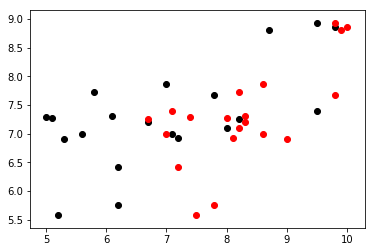

In [113]:
calc1 = points[1:,1]
lpt = points[1:,2]
p1 = points[1:,3]
ic = points[1:,4]
calc2 = points[1:,5]
cra = points[1:,6]

a = np.array([calc1,ic])
a = a.transpose()
a_train = a[:-20]
a_test = a[-20:]

b = cra

b_train = b[:-20]
b_test = b[-20:]

clf = linear_model.LinearRegression()
clf.fit(a_train, b_train)

cra_pred = clf.predict(a_test)

print('Coefficients: ', clf.coef_)

print("Mean squared error: %.2f"
      % mean_squared_error(b_test, cra_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(b_test, cra_pred))

calc1_plot = a_test[:,0]
ic_plot =  a_test[:,1]
# Plot outputs
plt.scatter(calc1_plot, b_test,  color='black')
plt.scatter(ic_plot, b_test,  color='red')


plt.show()

### Conclusão dos resultados

Após ambos algoritmos serem executados podemos ver que o erro para o scikit-learn foi quase <b>duas vezes menor</b> que o do gradiente descendente. A explicação para isso pode se dar por uma escolha de learning rate equivocada. Já para os valores dos coeficientes não podemos ver nenhuma diferença expressiva para w1, os valores são bem próximos, diferentemente para w0 que o valor chega a ser quase 10 vezes maior. O número de iterações para o gradiente descentente se manteve em 2000.

### Explicação plot

O plot no final dessa sessão descreve o comportamento das duas features em relação ao cra, em forma de gráfico de dispersão.